In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# load data to a variable
city_data_csv = "data/city_data.csv"
ride_data_csv = "data/ride_data.csv"

# Read Data
city_data = pd.read_csv(city_data_csv)
ride_data = pd.read_csv(ride_data_csv)

# Merge into a new DF
city_ride_data = city_data.merge(ride_data, on = 'city')

# Create a new df with the selected columns

city_ride_data = pd.DataFrame(city_ride_data,columns=['city','date', 'fare', 'ride_id','driver_count', 'type'])

# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [5]:
#separate data frames for types of city

#get unique values for type
#print(city_ride_data['type'].unique())

#separate cities by type
urban_type = city_ride_data.loc[(city_ride_data["type"] == "Urban")]
rural_type = city_ride_data.loc[(city_ride_data["type"] == "Rural")]
suburban_type = city_ride_data.loc[(city_ride_data["type"] == "Suburban")]

In [6]:
# Per city calculations of Average Fare per City
#####Urban

urban_average_fare = urban_type.groupby(["city"])["fare"].mean()
#print(urban_average_fare)

#Total Rides 
urban_total_rides = urban_type.groupby(["city"])["ride_id"].count()
#print(urban_total_rides)

#Total Drivers for Urban cities
urban_total_drivers = urban_type.groupby(["city"])["driver_count"].value_counts()
#print(urban_total_drivers)


In [7]:
# Per city calculations of Average Fare per City
#####rural

rural_average_fare = rural_type.groupby(["city"])["fare"].mean()
#print(rural_average_fare)

#Total Rides 
rural_total_rides = rural_type.groupby(["city"])["ride_id"].count()
#print(rural_total_rides)

#Total Drivers for Urban cities
rural_total_drivers = rural_type.groupby(["city"])["driver_count"].count()
#print(rural_total_drivers)


In [8]:
# Per city calculations of Average Fare per City
#####suburban

suburban_average_fare = suburban_type.groupby(["city"])["fare"].mean()
#print(suburban_average_fare)

#Total Rides 
suburban_total_rides = suburban_type.groupby(["city"])["ride_id"].count()
#print(suburban_total_rides)

#Total Drivers for Urban cities
suburban_total_drivers = suburban_type.groupby(["city"])["driver_count"].count()
#print(suburban_total_drivers)

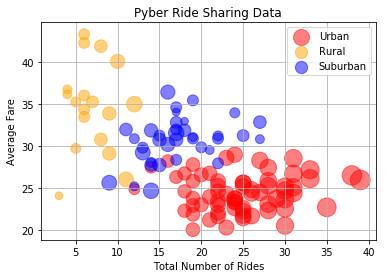

In [9]:
#urban scatter
plt.scatter(urban_total_rides, urban_average_fare, marker="o", facecolors="red", 
            s=urban_total_drivers*10, alpha = 0.5, label = "Urban")
#urban scatter
plt.scatter(rural_total_rides, rural_average_fare, marker="o", facecolors="orange", 
            s=rural_total_drivers*20, alpha = 0.5, label = "Rural")

#urban scatter
plt.scatter(suburban_total_rides, suburban_average_fare, marker="o", facecolors="blue", 
            s=rural_total_drivers*20, alpha = 0.5, label = "Suburban")

#Legend and chart description
plt.grid()
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare")
plt.legend(loc = 'best')

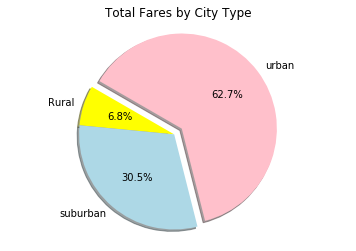

In [10]:
#total fares by city

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
#sizes = [15, 30, 45, 10]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

#fig1, ax1 = plt.subplots()
#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        #shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

total_fare = city_ride_data.groupby(["type"])["fare"].sum()

labels = ["Rural","suburban", "urban"]
colors = ["yellow","lightblue","pink"]
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, radius=1)
plt.axis("equal")
plt.title("Total Fares by City Type")

plt.show()

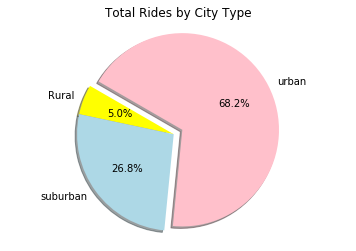

In [11]:
total_rides = city_ride_data.groupby(["type"])["ride_id"].sum()

labels = ["Rural","suburban", "urban"]
colors = ["yellow","lightblue","pink"]
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, radius=1)
plt.axis("equal")
plt.title("Total Rides by City Type")

plt.show()

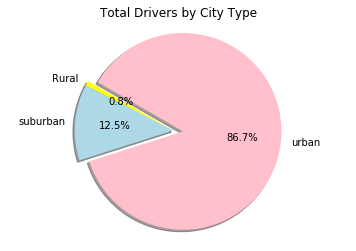

In [12]:
total_drivers = city_ride_data.groupby(["type"])["driver_count"].sum()

labels = ["Rural","suburban", "urban"]
colors = ["yellow","lightblue","pink"]
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150,)
plt.axis("equal")
plt.title("Total Drivers by City Type")

plt.show()